In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
geo_routes = pd.read_csv("geo_routes.csv")
geo_routes[:5]

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


## World Map
1. created a world map using basemap
2. wrote function to read in all start and end coordinates from dataframe to visualize the flying routes
3. creating dataframe and passing it into the function just for the Hamburg Airport because i live in this city

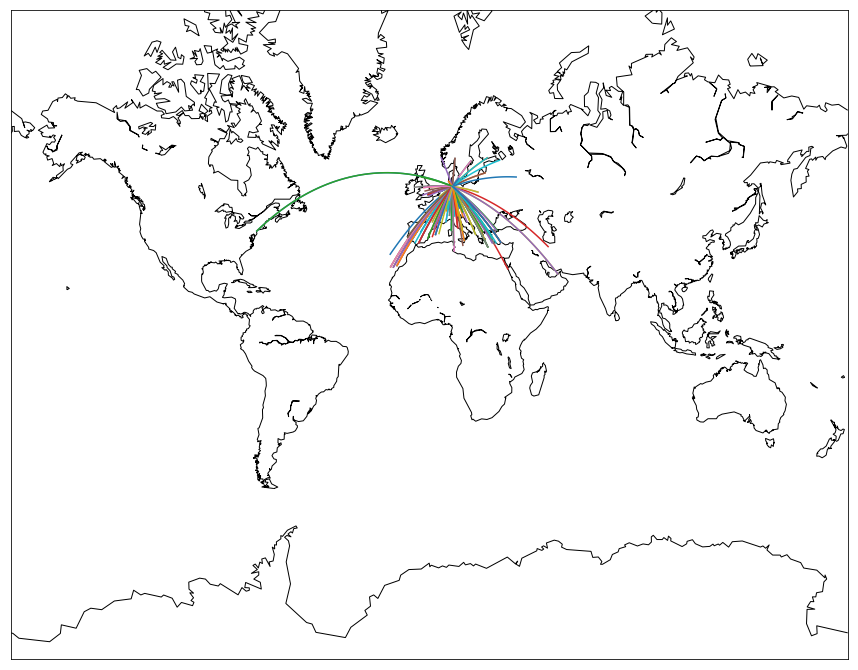

In [3]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(dataframe):
    for index,row in dataframe.iterrows():
        end_lat = row["end_lat"]
        start_lat = row["start_lat"]
        end_lon = row["end_lon"]
        start_lon = row["start_lon"]
        diff_lat = end_lat - start_lat
        diff_lon = end_lon -start_lon
        if abs(diff_lat) < 180 and abs(diff_lon) < 180:
            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
            
            
ham = geo_routes[geo_routes['source'] == "HAM"]
create_great_circles(ham)
plt.show()